In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
gares = gpd.read_file("stationsnewligne.geojson")
gares.head()

,libel,uic,num,pk,frevoy,nom,insee,info,ecart,geometry
0,Paris-Est,87113001,001000,0+000,NO,Paris,75110,None,None,POINT (2.35893 48.87737)
1,Rosa Parks,87654798,001000,2+490,NO,Paris-19,75119,None,None,POINT (2.37952 48.89756)
2,Paris-La Villette-Hébert,87113134,001000,2+000,ON,Paris-18,75119,None,None,POINT (2.37076 48.89508)
3,Pantin,87113209,001000,4+460,OO,Pantin,93055,None,None,POINT (2.40025 48.89807)
4,Noisy-le-Sec,87113217,001000,8+910,OO,Noisy-le-Sec,93053,None,None,POINT (2.46035 48.89663)


In [7]:
list(gares)

['libel',
 'uic',
 'num',
 'pk',
 'frevoy',
 'nom',
 'insee',
 'info',
 'ecart',
 'geometry']

<AxesSubplot:>

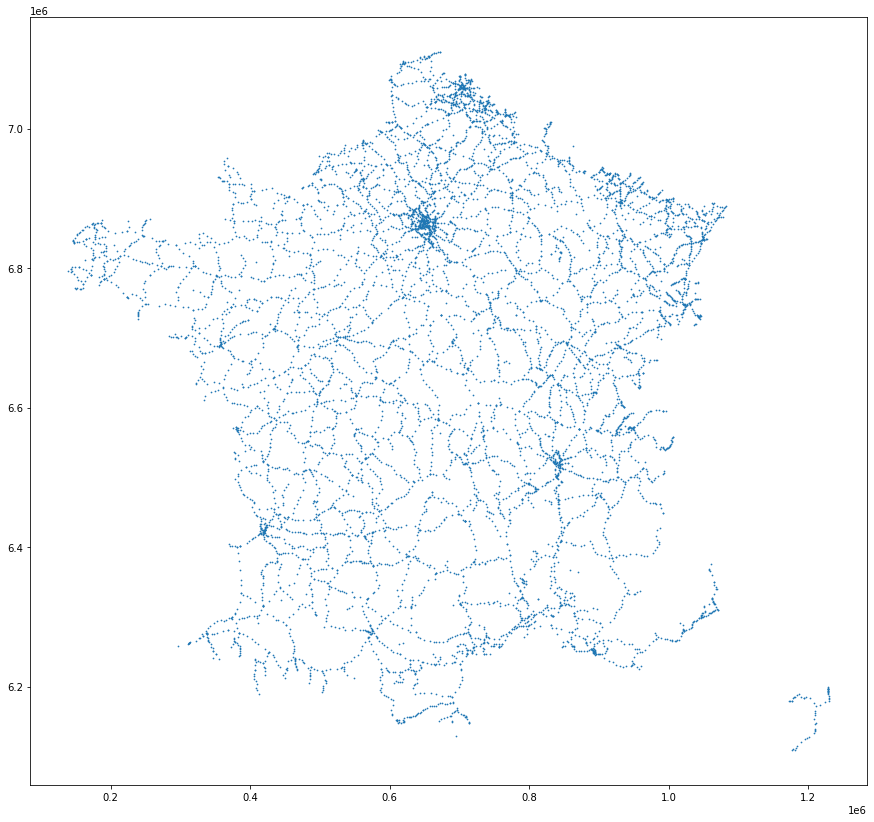

In [16]:
gares.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'lcc', 
    'lat_1' : 49,
    'lat_2': 44,
    'lat_0': 46.5,
    'lon_0': 3,
    'units':'m',
    'ellps':'GRS80',
    'towg84':'0,0,0,0,0,0,0',
    "x_0":700000,
    "y_0":6600000}).plot(figsize=(15,15), markersize=0.5)

In [8]:
regions=gpd.read_file("C:\\Users\\huber\\OneDrive\\Documents\\2-Informatique\\4-Python\\3-GeoData\\France-regions\\regions-20140306-5m.shp")
regions.head()

,code_insee,nom,nom_cl,insee_cl,nuts2,iso3166_2,wikipedia,nb_dep,nb_comm,surf_km2,geometry
0,42,Alsace,Strasbourg,67482,FR42,None,fr:Alsace,2,904,8328.0,"POLYGON ((7.43003 47.45949, 7.42922 47.45838, ..."
1,72,Aquitaine,Bordeaux,33063,FR61,None,fr:Aquitaine,5,2296,41818.0,"MULTIPOLYGON (((-1.75633 43.38372, -1.75610 43..."
2,83,Auvergne,Clermont-Ferrand,63113,FR72,None,fr:Auvergne,4,1310,26172.0,"POLYGON ((3.33690 44.95609, 3.33512 44.95423, ..."
3,25,Basse-Normandie,Caen,14118,FR25,None,fr:Basse-Normandie,3,1812,17786.0,"MULTIPOLYGON (((-1.51504 48.66027, -1.51452 48..."
4,26,Bourgogne,Dijon,21231,FR26,None,fr:Bourgogne,4,2046,31752.0,"POLYGON ((4.76293 46.17583, 4.76275 46.17632, ..."


In [32]:
regions.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'lcc', 
    'lat_1' : 49,
    'lat_2': 44,
    'lat_0': 46.5,
    'lon_0': 3,
    'units':'m',
    'ellps':'GRS80',
    'towg84':'0,0,0,0,0,0,0',
    "x_0":700000,
    "y_0":6600000}, inplace=True)
gares.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'lcc', 
    'lat_1' : 49,
    'lat_2': 44,
    'lat_0': 46.5,
    'lon_0': 3,
    'units':'m',
    'ellps':'GRS80',
    'towg84':'0,0,0,0,0,0,0',
    "x_0":700000,
    "y_0":6600000}, inplace=True)

AxesSubplot(0.125,0.352861;0.775x0.299277)


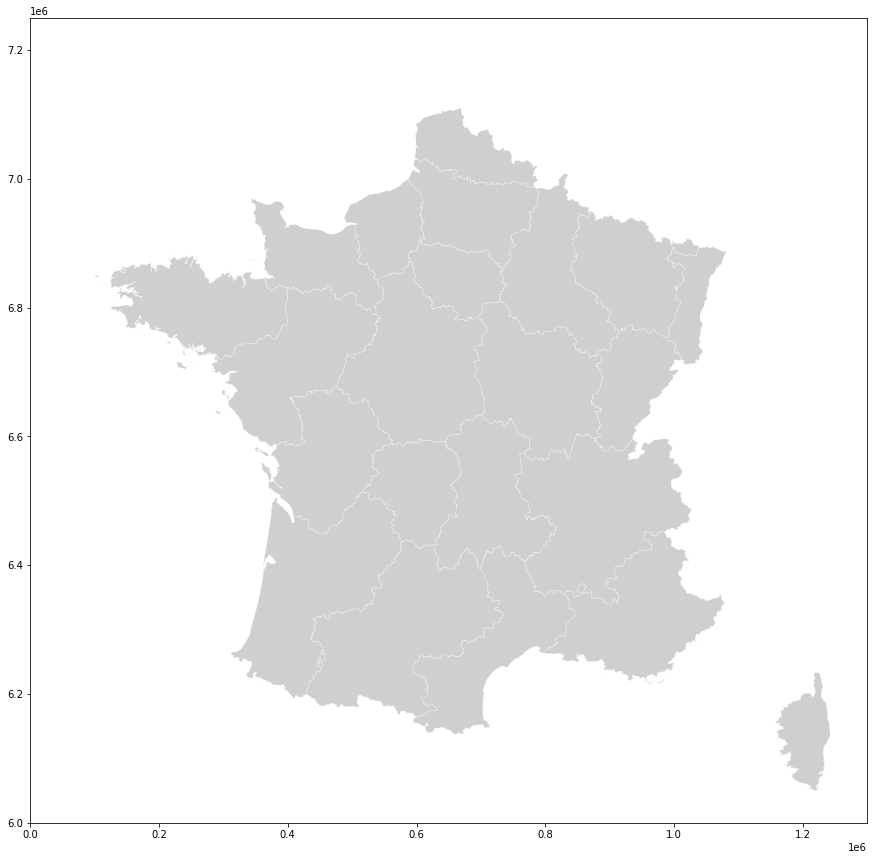

In [36]:
carte_de_france = regions.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'lcc', 
    'lat_1' : 49,
    'lat_2': 44,
    'lat_0': 46.5,
    'lon_0': 3,
    'units':'m',
    'ellps':'GRS80',
    'towg84':'0,0,0,0,0,0,0',
    "x_0":700000,
    "y_0":6600000}).plot(figsize=(15,15), color='#CFCFCF', edgecolor='#FFFFFF', linewidth=0.2)
carte_de_france.set_xlim([0,1.30e6])
carte_de_france.set_ylim([6e6,7.25e6])
print(carte_de_france.axes)

<AxesSubplot:>

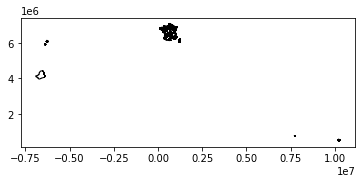

In [38]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
regions.plot(ax=ax, color='white', edgecolor='black')

Text(0.5, 1.0, 'Carte de France avec ses gares')

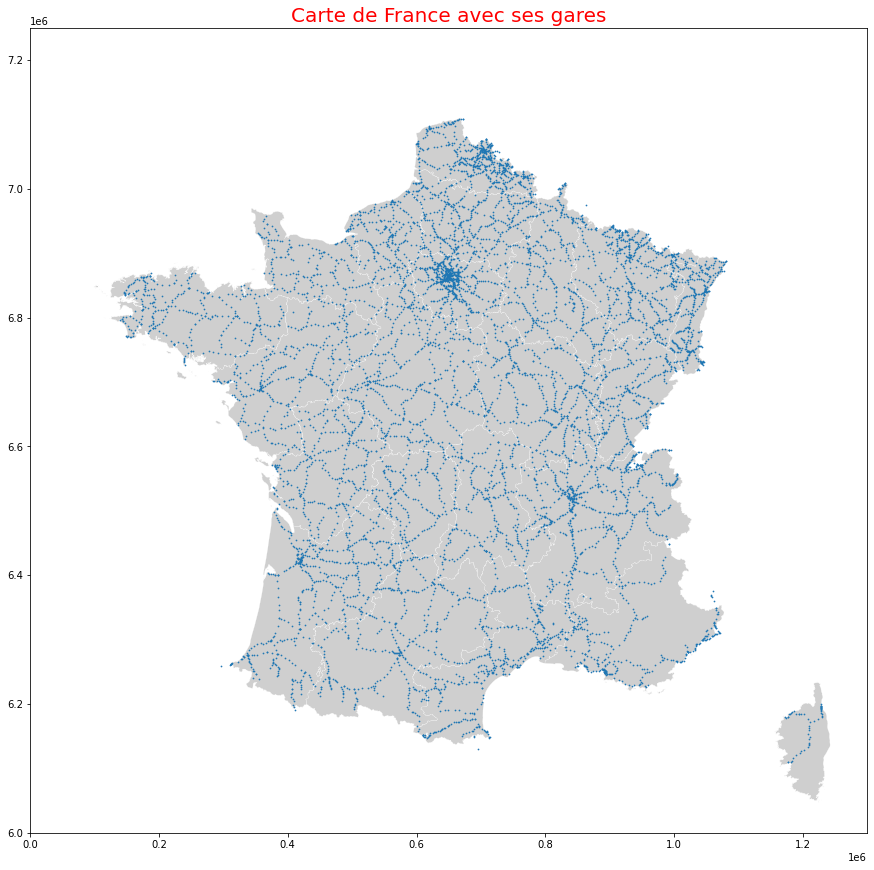

In [55]:
ax.set_aspect("equal")
carte_de_france = regions.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'lcc', 
    'lat_1' : 49,
    'lat_2': 44,
    'lat_0': 46.5,
    'lon_0': 3,
    'units':'m',
    'ellps':'GRS80',
    'towg84':'0,0,0,0,0,0,0',
    "x_0":700000,
    "y_0":6600000}).plot(figsize=(15,15), color='#CFCFCF', edgecolor='#FFFFFF', linewidth=0.2)
carte_de_france.set_xlim([0,1.30e6])
carte_de_france.set_ylim([6e6,7.25e6])

carte_de_france_avec_ses_gares = gares.to_crs({
    'datum': 'NAD83', 
    'no_defs': True,
    'proj':'lcc', 
    'lat_1' : 49,
    'lat_2': 44,
    'lat_0': 46.5,
    'lon_0': 3,
    'units':'m',
    'ellps':'GRS80',
    'towg84':'0,0,0,0,0,0,0',
    "x_0":700000,
    "y_0":6600000}).plot(ax=carte_de_france, figsize=(15,15), markersize=0.5)
plt.title("Carte de France avec ses gares", fontsize=20, color="red")
plt.savefig("carte_de_france_avec_ses_gares.png", dpi=500)